<a href="https://colab.research.google.com/github/sh3986/kaggle/blob/main/v6_keras_gray_re255_mobilenet_pretrain_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Library

In [2]:
import numpy as np 
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = "{:.5f}".format

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline

import os
from os import listdir
from os.path import isfile, join
import cv2
from PIL import Image
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Average
from tensorflow.keras import optimizers
tf.__version__

'2.8.2'

In [3]:
# Visualization
from tensorflow.keras.utils import plot_model

# Splitting data
from sklearn.model_selection import train_test_split

# Metrics 
from sklearn.metrics import confusion_matrix, classification_report

# Deep Learning
import tensorflow as tf
print('TensoFlow Version: ', tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.applications.resnet import ResNet50

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

import skimage.morphology as morp
from skimage.filters import rank
from sklearn import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TensoFlow Version:  2.8.2


In [4]:
data_path = "/content/drive/MyDrive/Colab Notebooks/Kaggle/project_2_cnn"

In [5]:
import os
os.chdir(data_path)

In [6]:
data = []
labels = []

height = 180
width = 180
channels = 3
num_classes = 43

In [ ]:
# for i in range(num_classes) :
#     path = f'./data/Train/{i}/'
#     Class = os.listdir(path)
#     for a in Class:
#         image = cv2.imread(path + a)
#         image_from_array = Image.fromarray(image, 'RGB')
#         size_image = image_from_array.resize((height, width))
#         data.append(np.array(size_image))
#         labels.append(i)

# data = np.array(data)
# labels = np.array(labels)

# import pickle
# with open("/content/drive/MyDrive/Colab Notebooks/Kaggle/project_2_cnn/data/train_data_180.pkl","wb") as f:
#     pickle.dump(data, f)

# with open("/content/drive/MyDrive/Colab Notebooks/Kaggle/project_2_cnn/data/train_label_180.pkl","wb") as f:
#     pickle.dump(labels, f)

### 데이터 로드

In [7]:
import pickle
with open("/content/drive/MyDrive/Colab Notebooks/Kaggle/project_2_cnn/data/train_data_180.pkl","rb") as f:
    data = pickle.load(f)
import pickle
with open("/content/drive/MyDrive/Colab Notebooks/Kaggle/project_2_cnn/data/train_label_180.pkl","rb") as f:
    labels = pickle.load(f)

In [8]:
print(data.shape)
print(labels.shape)

(26010, 180, 180, 3)
(26010,)


In [9]:
X = data
y = tf.one_hot(labels, num_classes).numpy()

In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
# validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
# test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

### 전처리

In [61]:
# def to_grayscale_then_rgb(img):
#     img = tf.image.rgb_to_grayscale(img)
#     img = tf.image.grayscale_to_rgb(img)
#     return img

# def img_contrast(img):
#     lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
#     l, a, b = cv2.split(lab)
#     clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
#     cl = clahe.apply(l)
#     limg = cv2.merge((cl, a, b))
#     final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
#     image_from_array = Image.fromarray(final, 'RGB')
#     size_image = image_from_array.resize((height, width))

#     return np.array(size_image)

# def preprocessing(img):
#     img = img_contrast(to_grayscale_then_rgb(img))
#     return data 

### Train, Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, shuffle=True, stratify=y)

In [ ]:
# f, ax = plt.subplots(figsize=(10, 5))
# sns.countplot(np.argmax(y_train, axis=1))

### Data Augmentation

In [43]:
def to_grayscale_then_rgb(img):
    img = img
    img = tf.image.rgb_to_grayscale(img)
    img = tf.image.grayscale_to_rgb(img)
    return np.array(img)

def img_contrast(img):
    print(img.shape)
    return img
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    image_from_array = Image.fromarray(final, 'RGB')
    size_image = image_from_array.resize((img[0].shape[0], img[0].shape[1]))

    return np.array(size_image)

def preprocessing(img):
    img = to_grayscale_then_rgb(img)
    return img

In [44]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocessing,
    brightness_range=[0.6, 0.9],
    zoom_range=0.2,
    width_shift_range=0.2,    
    height_shift_range=0.2,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(
    preprocessing_function=preprocessing
)

In [45]:
train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size = 32
) 

valid_generator = valid_datagen.flow(
    X_test, y_test,
    batch_size = 32,
    shuffle=False
)

#### Aug Test

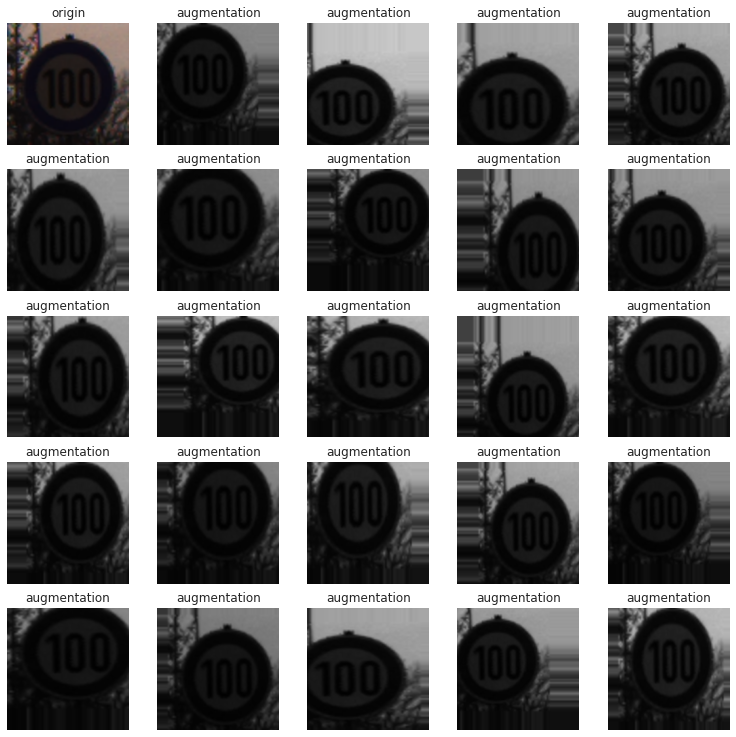

In [42]:
idx = 6768

input_img = np.array([X[idx]])
input_label = y[idx]

generator = train_datagen.flow(input_img, batch_size=1)
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

f, axes = plt.subplots(5, 5, figsize=(13, 13))
ax_list = axes.flat
ax_list[0].imshow(input_img[0])
ax_list[0].axis('off')
ax_list[0].set_title("origin")

for i, img in enumerate(generator):
    # plot_img = preprocess_input(img[0])
    plot_img = img[0]/255.0
    ax_list[i+1].imshow(plot_img)
    ax_list[i+1].axis('off')   
    ax_list[i+1].set_title("augmentation")
    if i > 22:
        break

### 모델 생성

In [49]:
IMG_SHAPE = (height, width, channels)

In [50]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [51]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

In [ ]:
# 모델 테스팅
# image_batch, label_batch = next(iter(train_generator))
# feature_batch = base_model(image_batch)
# print(feature_batch.shape)
# train_generator.reset()

(32, 6, 6, 1280)


In [189]:
base_model.trainable = False

In [ ]:
base_model.summary()

In [191]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer =  Dense(num_classes, activation= 'softmax')

In [192]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [193]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 180, 180, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_2 (TFOpLam  (None, 180, 180, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                  

### 모델 학습

In [64]:
model_check = ModelCheckpoint('./workplace/model/mobilenet_pretrained.h5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=0, mode='max', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)
n_epochs = 20

In [ ]:
history =  model.fit(
    train_generator, 
    batch_size = 32, epochs = n_epochs, verbose = 1, 
    validation_data=valid_generator, 
    callbacks = [model_check, early, reduce_lr]
)

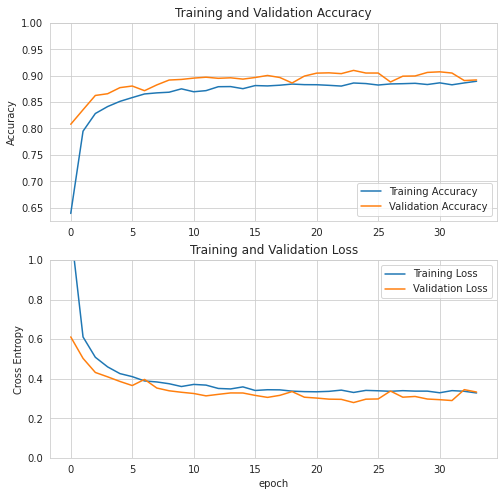

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### 모델 Fine Tuning

In [52]:
base_model.trainable = True

In [53]:
print("Number of layers in the base model: ", len(base_model.layers))
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  154


In [58]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
scale_input =  tf.keras.layers.Rescaling(1/255, 0.0)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer =  Dense(num_classes, activation= 'softmax')

In [59]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
# x = preprocess_input(inputs)
x = scale_input(inputs)
x = base_model(x, training=True)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [60]:
len(model.trainable_variables)

56

In [61]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 43)                55083 

In [62]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_check = ModelCheckpoint('./workplace/model/gray_re255_mobilenet_pretrained_fine_tuning.h5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=0, mode='max', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [ ]:
fine_tune_epochs = 10
total_epochs =  n_epochs + fine_tune_epochs

history_fine =  model.fit(
    train_generator, 
    batch_size = 32, epochs = total_epochs, verbose = 1, 
    validation_data=valid_generator, 
    callbacks = [model_check, early, reduce_lr]
)

Epoch 1/30
293/651 [============>.................] - ETA: 1:56 - loss: 0.6274 - accuracy: 0.8251

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

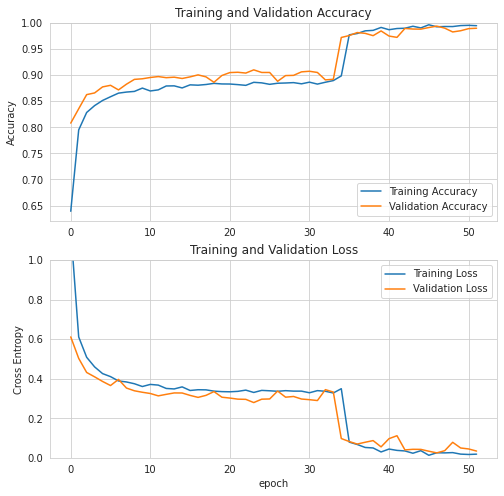

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### 모델 성능 평가

In [ ]:
# model_path = './workplace/model/base_line.h5'
# model.load_weights(model_path)

In [ ]:
loss, acc = model.evaluate_generator(valid_generator)
print('Accuracy: ', acc, '\nLoss    : ', loss)

Accuracy:  0.9938485026359558 
Loss    :  0.024905558675527573


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

valid_generator.reset()
y_pred = model.predict_generator(valid_generator)
y_pred = tf.argmax(y_pred, axis=1).numpy()

In [ ]:
print(classification_report(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.99      0.98      0.99       252
           2       0.98      0.98      0.98       252
           3       0.99      0.99      0.99       252
           4       1.00      0.99      0.99       252
           5       0.98      0.98      0.98       252
           6       0.97      1.00      0.99        36
           7       0.99      1.00      0.99       252
           8       1.00      1.00      1.00       252
           9       1.00      0.99      1.00       252
          10       1.00      1.00      1.00       252
          11       1.00      1.00      1.00       252
          12       1.00      1.00      1.00       252
          13       1.00      1.00      1.00       252
          14       1.00      0.99      1.00       126
          15       0.98      1.00      0.99       126
          16       1.00      0.97      0.99        36
          17       0.99    

In [ ]:
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred, labels=range(43))
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(cm, annot=True,  cmap='Blues')

### Ensemble

In [ ]:
model_baseline = create_model(img_rows,img_cols,img_channels)
model_gray_minmax = create_model(img_rows,img_cols,img_channels)
model_gray_contrast_minmax_over = create_model(img_rows,img_cols,img_channels)

model_baseline.load_weights('./workplace/model/model_no_preprocess_94.h5')
model_gray_minmax.load_weights('./workplace/model/mode_gray_minmax.h5')
model_gray_contrast_minmax_over.load_weights('./workplace/model/model_contrast_gray_oversample_minmax_99.h5')


models = [model_baseline, model_gray_minmax, model_gray_contrast_minmax_over]

In [ ]:
def ensemble(models):
    input = Input(shape=(img_rows,img_cols,img_channels))
    outputs = [model.outputs[0] for model in models]
    y = Average()(outputs)
    
    model = Model(Average, y, name='ensemble')
    return model

In [ ]:
ensemble_model = ensemble(models)

ValueError: ignored

### 모델 테스트

In [ ]:
from tensorflow import keras 
model = keras.models.load_model(model_name)

### 테스트 데이터 예측

In [ ]:
# test_data = []
# file_name = []
# path = f'./data/Test/'
# Class = os.listdir(path)
# for a in Class:
#     image = cv2.imread(path + a)
#     image_from_array = Image.fromarray(image, 'RGB')
#     size_image = image_from_array.resize((height, width))
#     test_data.append(np.array(size_image))
#     file_name.append(a)

# test_data = np.array(test_data)
# file_name = np.array(file_name)

# import pickle 

# with open('./data/test_data_180.pkl', 'wb') as f:
#     pickle.dump(test_data, f)

# with open('./data/file_name_180.pkl', 'wb') as f:
#     pickle.dump(file_name, f)

In [ ]:
import pickle
with open('./data/test_data_180.pkl', 'rb') as f:
    test_data = pickle.load(f)

with open('./data/file_name_180.pkl', 'rb') as f:
    file_name = pickle.load(f)

In [ ]:
test_data.shape

In [ ]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow(
    test_data,
    batch_size = 32,
    shuffle=False
) 
test_generator.reset()
test_label = model.predict_generator(test_generator)
test_label = tf.argmax(test_label, axis=1).numpy()

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(test_label)

In [ ]:
img_data = [np.array(x) for x in test_data]
img_df = pd.DataFrame({'img':img_data, 'file_name':file_name, 'label':test_label})
debug_data = img_df.sort_values(by=['file_name'])

In [ ]:
def debug_image(debug_data, category, next_file=None):
    filter_data = debug_data[debug_data['label']==category].reset_index()
    if next_file is not None:
        filter_data = filter_data[filter_data['file_name'] > next_file]

    fig, axes = plt.subplots(nrows = 10, ncols = 10, figsize=(18, 23))
    for i, ax in enumerate(axes.flat):
        record = filter_data.iloc[i]
        img = record['img']
        file_name = record['file_name']
        ax.imshow(img)
        ax.set_title(file_name, fontsize=14)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()
    plt.show() 

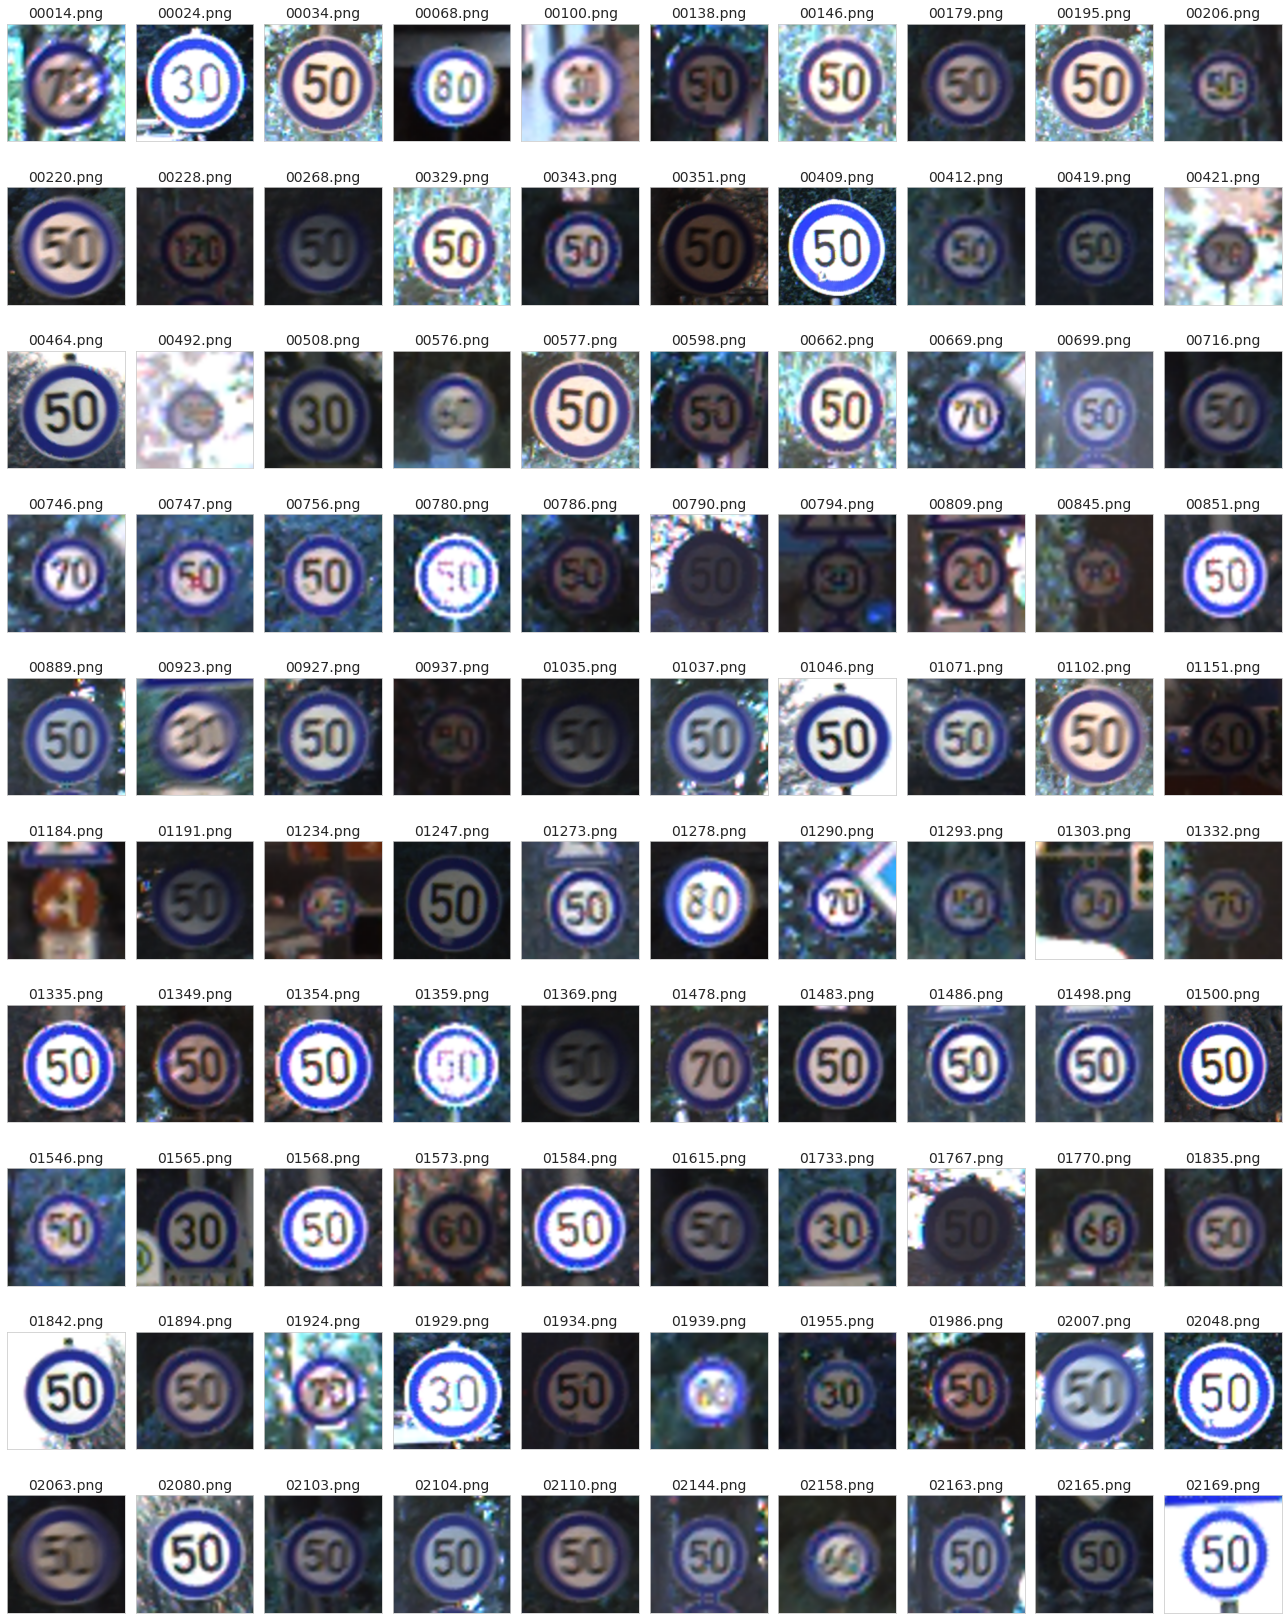

In [ ]:
debug_image(debug_data, 2)

In [ ]:
csv_data = pd.DataFrame(np.concatenate((file_name.reshape(-1, 1), test_label.reshape(-1,1)), axis=1))
csv_data = csv_data.sort_values(by=[0])
csv_data.head()

,0,1
279,00000.png,16
8119,00001.png,1
3628,00002.png,38
1565,00003.png,33
5360,00004.png,11


In [ ]:
csv_data.to_csv("predicted_output_v4.csv", header=False, index=False)

In [ ]:
from google.colab import files
files.download("predicted_output_v4.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 주석

살짝 로테이션 줘야하나

```python
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 50
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

# Prepare data-augmenting data generator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        preprocessing_function=add_noise,
    )
```

```python
def get_ensemble():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', DecisionTreeClassifier())])
	models.append(('norm', norm))
	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', DecisionTreeClassifier())])
	models.append(('std', std))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', DecisionTreeClassifier())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', DecisionTreeClassifier())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', DecisionTreeClassifier())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', DecisionTreeClassifier())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble
```


# 노트

mobilenet preproceessing이랑 gray scale이랑 안맞는듯